In [1]:
import numpy as np
import pandas as pd

In [2]:
pd.read_csv(r"H:\dataset_csv\airfoil_self_noise.dat",sep='\t')

,800,0,0.3048,71.3,0.00266337,126.201
0,1000,0.0,0.3048,71.3,0.002663,125.201
1,1250,0.0,0.3048,71.3,0.002663,125.951
2,1600,0.0,0.3048,71.3,0.002663,127.591
3,2000,0.0,0.3048,71.3,0.002663,127.461
4,2500,0.0,0.3048,71.3,0.002663,125.571
...,...,...,...,...,...,...
1497,2500,15.6,0.1016,39.6,0.052849,110.264
1498,3150,15.6,0.1016,39.6,0.052849,109.254
1499,4000,15.6,0.1016,39.6,0.052849,106.604
1500,5000,15.6,0.1016,39.6,0.052849,106.224


In [3]:
df=pd.read_csv(r"H:\dataset_csv\airfoil_self_noise.dat",sep='\t',header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
df.columns=["Frequency","Angle of attack","Chord length",
           "Free-stream velocity","Suction side ","pressure level"]

In [6]:
df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [7]:
df.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Frequency             1503 non-null   int64  
 1   Angle of attack       1503 non-null   float64
 2   Chord length          1503 non-null   float64
 3   Free-stream velocity  1503 non-null   float64
 4   Suction side          1503 non-null   float64
 5   pressure level        1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [9]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=50)

In [11]:
x_train.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
1358,2000,6.7,0.1016,55.5,0.005214
1226,250,22.2,0.0254,39.6,0.022903
952,500,19.7,0.0508,39.6,0.036484
578,3150,5.4,0.1524,39.6,0.004850
1254,630,0.0,0.1016,55.5,0.001320


In [12]:
import seaborn as sns

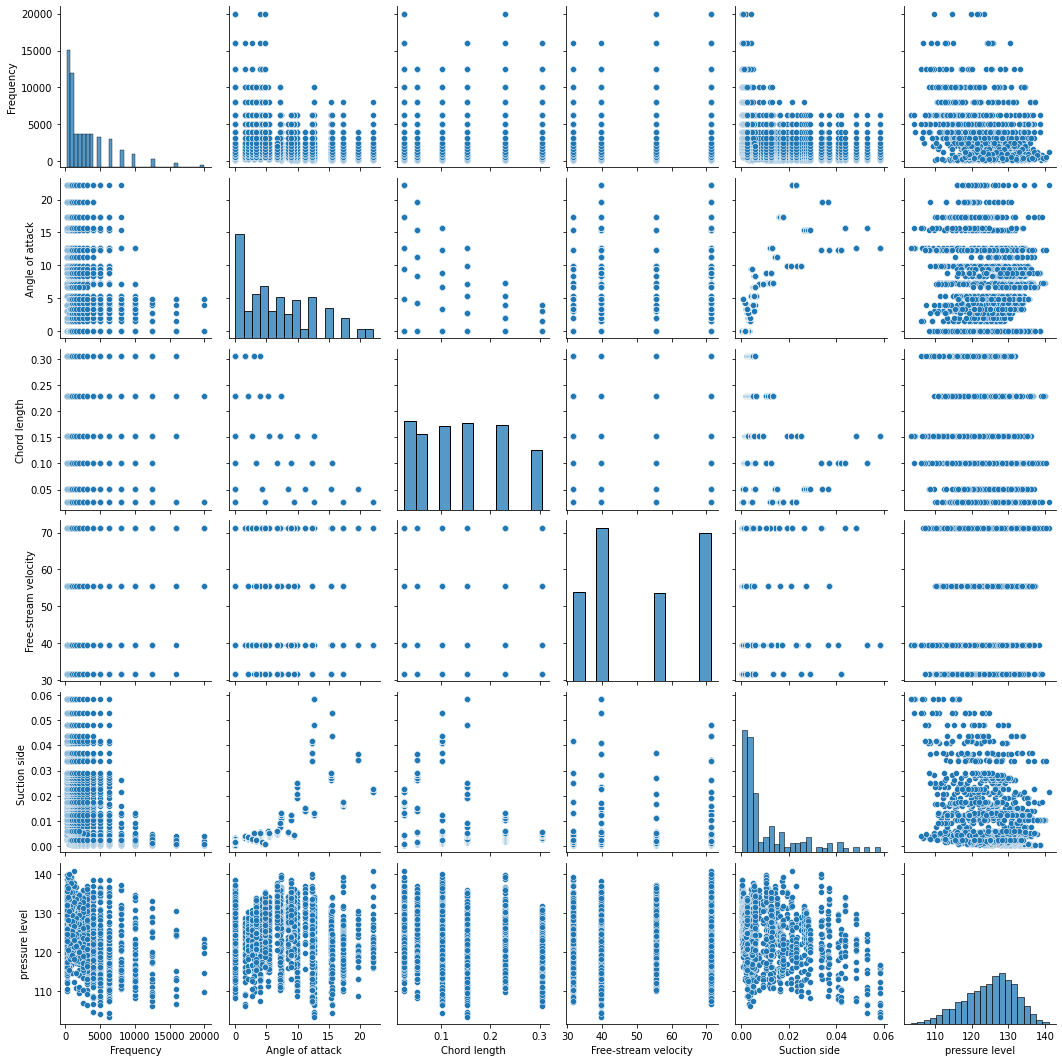

In [13]:
sns.pairplot(df)

In [14]:
x_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.291459,0.004905,0.145507,-0.249094
Angle of attack,-0.291459,1.000000,-0.501553,0.063312,0.762637
Chord length,0.004905,-0.501553,1.000000,-0.022050,-0.230556
Free-stream velocity,0.145507,0.063312,-0.022050,1.000000,-0.005522
Suction side,-0.249094,0.762637,-0.230556,-0.005522,1.000000


C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

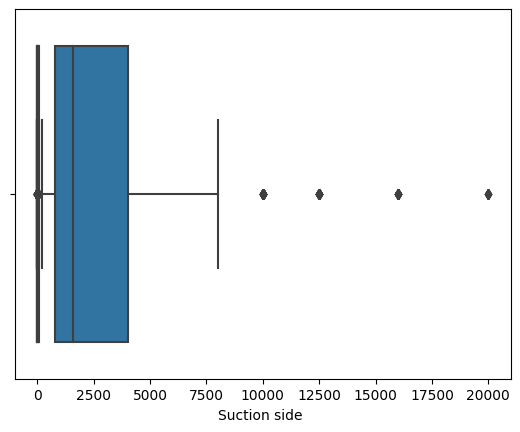

In [15]:
for i in x_train.columns:
    sns.boxplot(x_train[i])

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='pressure level'>

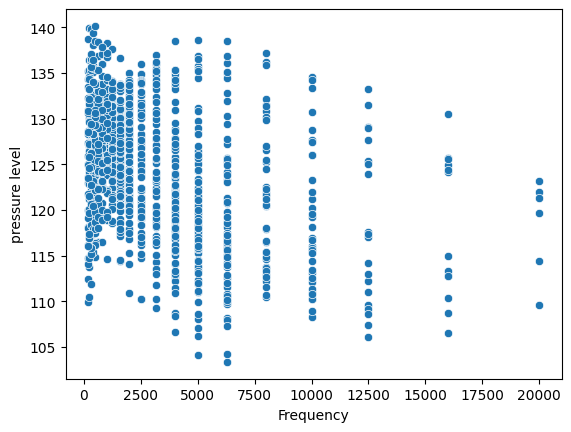

In [16]:
sns.scatterplot(x_train["Frequency"],df["pressure level"])

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frequency', ylabel='pressure level'>

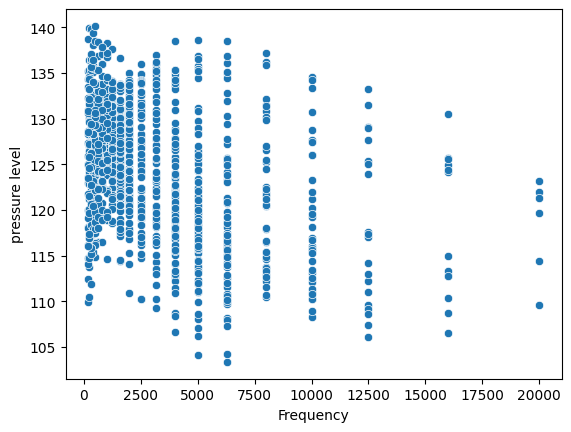

In [17]:
sns.scatterplot(x_train["Frequency"],df[ 'pressure level'])

In [18]:
df.columns

Index(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
       'Suction side ', 'pressure level'],
      dtype='object')

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pressure level'>

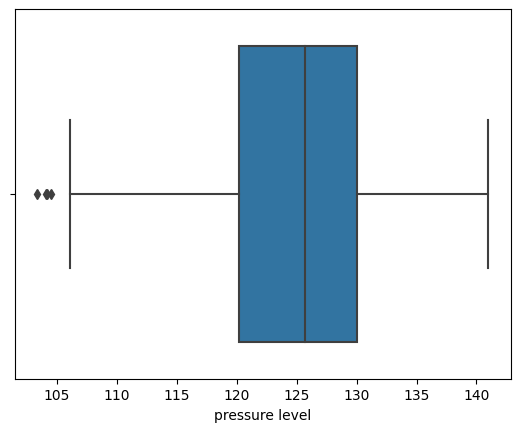

In [19]:
sns.boxplot(df[ 'pressure level'])

In [20]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [29]:
import pickle
pickle.dump(regression,open('model.pkl','wb'))

In [21]:
regression.score(x_test,y_test)

0.5003327508170112

In [22]:
from sklearn.tree import DecisionTreeRegressor
decision_reg=DecisionTreeRegressor()
decision_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [23]:
decision_reg.score(x_test,y_test)

0.8528860748567696

In [24]:
decision_reg.score(x_train,y_train)

1.0

### Lasso

In [72]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet

In [73]:
lasso_model=Lasso(normalize=True)
lasso_model.fit(x_train,y_train)

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(normalize=True)

In [74]:
lasso_model.score(x_train,y_train)

0.0

In [75]:
lasso_model.score(x_test,y_test)

-9.784002021007154e-05

In [76]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

In [77]:
lasso_cv_model=LassoCV(cv=5,max_iter=5000,normalize=True)
lasso_cv_model.fit(x_train,y_train)

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(cv=5, max_iter=5000, normalize=True)

In [78]:
lasso_cv_model.score(x_test,y_test)

0.5004418203556944

In [79]:
lasso_cv_model.score(x_train,y_train)

0.5160375708129377

### Ridge

In [81]:
ridge_cv=RidgeCV(alphas=(0.1,1.0,10.0),cv=10,normalize=True)
ridge_cv.fit(x_train,y_train)

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preproce

RidgeCV(cv=10, normalize=True)

In [82]:
ridge_cv.score(x_train,y_train)

0.5033229476819754

In [83]:
ridge_cv.score(x_test,y_test)

0.5044708403391102

In [35]:
y_pred=decision_reg.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score,classification_report
decision_score=accuracy_score(y_pred,y_test)

ValueError: continuous is not supported

### Standarization

In [30]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [32]:
arr=scaler.fit_transform(x,y)

In [33]:
scaler.fit_transform(x_train,y_train)

array([[-0.28543339, -0.02149892, -0.37029465,  0.29564604, -0.45710383],
       [-0.82053595,  2.60159518, -1.18648201, -0.72663071,  0.9023611 ],
       [-0.74409273,  2.17851549, -0.91441956, -0.72663071,  1.94613234],
       ...,
       [-0.59120628, -0.64765687,  1.80620497, -0.72663071, -0.47681614],
       [ 0.06620543, -0.59688731, -0.37029465,  0.29564604, -0.68788908],
       [ 1.02939003, -0.64765687,  1.80620497,  1.31149338, -0.53062479]])

In [34]:

df.head()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


## Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor
random_regression=RandomForestRegressor(n_estimators=100,criterion='mse')
random_regression.fit(x_train,y_train)

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


RandomForestRegressor(criterion='mse')

In [27]:
random_regression.score(x_test,y_test)

0.9283795401574569

In [29]:
random_regression.score(x_train,y_train)

0.990437230935755

In [76]:
import pickle
pickle.dump(random_regression, open('Random_regression_model.pkl','wb'))

In [39]:
# to read the pickle file

pickle_model=pickle.load(open('Random_regression_model.pkl','rb'))
pickle_model.predict(x_test)

array([120.18338, 116.25173, 134.29501, 120.15428, 120.48538, 129.04632,
       110.0191 , 106.3653 , 128.44435, 116.28939, 123.78717, 126.30369,
       128.2779 , 120.39107, 127.57088, 134.16653, 132.88501, 118.99334,
       122.75858, 132.58387, 123.63762, 125.66417, 125.41099, 114.3132 ,
       134.05041, 126.44421, 123.81563, 132.39665, 122.46682, 120.99391,
       128.91238, 129.57675, 125.14087, 125.94509, 128.73155, 128.05543,
       124.94011, 119.91912, 127.33678, 118.83471, 131.88981, 128.45544,
       124.58976, 123.23248, 114.30955, 131.33741, 129.2719 , 115.29768,
       130.39699, 134.3004 , 132.53975, 123.19564, 132.46838, 127.87186,
       133.19798, 128.6826 , 128.17732, 119.23912, 129.2805 , 113.80277,
       111.71259, 122.38829, 129.85918, 130.61655, 129.94956, 122.17566,
       121.88131, 128.26791, 128.41611, 129.19602, 125.61334, 114.4334 ,
       121.74312, 126.25913, 134.54059, 128.56504, 128.75198, 129.65657,
       130.27515, 133.54939, 126.29317, 129.32023, 

In [45]:
random_regression.predict(x_test)

array([120.18338, 116.25173, 134.29501, 120.15428, 120.48538, 129.04632,
       110.0191 , 106.3653 , 128.44435, 116.28939, 123.78717, 126.30369,
       128.2779 , 120.39107, 127.57088, 134.16653, 132.88501, 118.99334,
       122.75858, 132.58387, 123.63762, 125.66417, 125.41099, 114.3132 ,
       134.05041, 126.44421, 123.81563, 132.39665, 122.46682, 120.99391,
       128.91238, 129.57675, 125.14087, 125.94509, 128.73155, 128.05543,
       124.94011, 119.91912, 127.33678, 118.83471, 131.88981, 128.45544,
       124.58976, 123.23248, 114.30955, 131.33741, 129.2719 , 115.29768,
       130.39699, 134.3004 , 132.53975, 123.19564, 132.46838, 127.87186,
       133.19798, 128.6826 , 128.17732, 119.23912, 129.2805 , 113.80277,
       111.71259, 122.38829, 129.85918, 130.61655, 129.94956, 122.17566,
       121.88131, 128.26791, 128.41611, 129.19602, 125.61334, 114.4334 ,
       121.74312, 126.25913, 134.54059, 128.56504, 128.75198, 129.65657,
       130.27515, 133.54939, 126.29317, 129.32023, 

In [46]:
df.columns

Index(['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity',
       'Suction side ', 'pressure level'],
      dtype='object')

In [47]:
dict_test={
    'Frequency':9,
    'Angle of attack':8,
    'Chord length':10,
    'Free-stream velocity':1,
    'Suction side ':7
}    
    
    

In [48]:
type(dict_test)

dict

In [50]:
list(dict_test.values())

[9, 8, 10, 1, 7]

In [60]:
[list(dict_test.values())]

[[9, 8, 10, 1, 7]]

In [59]:
pickle_model.predict([[9, 8, 10, 1, 7]])[0]

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


117.58885000000004

In [53]:
random_regression.predict([[9, 8, 10, 1, 7]])

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([117.58885])

In [64]:
random_regression.predict([[800,0.0,0.3048,71.3,0.002663]])

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([126.34453])

In [62]:
df.head(3)

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951


In [68]:
df.loc[300]

Frequency               630.000000
Angle of attack           4.000000
Chord length              0.228600
Free-stream velocity     71.300000
Suction side              0.004006
pressure level          129.038000
Name: 300, dtype: float64

In [69]:
pickle_model.predict([[630,4,0.2286,71.30,0.004]])

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([129.52244])

In [75]:
regression.predict([[630,4,0.2286,71.30,0.004]])[0]

C:\Users\win11\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


128.50381028443596